In [14]:
!pip install scikit-learn

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
df_used = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df_used.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [4]:
label_counts = df_used['fuel_efficiency_mpg'].value_counts()
label_counts 

fuel_efficiency_mpg
13.231729    1
18.873086    1
10.471599    1
14.878684    1
18.339190    1
            ..
17.883330    1
15.216467    1
15.974084    1
10.820563    1
14.884467    1
Name: count, Length: 9704, dtype: int64

In [5]:
sorted_counts = label_counts.sort_values(ascending=False)
sorted_counts

fuel_efficiency_mpg
13.231729    1
18.889083    1
11.704658    1
17.658685    1
14.246341    1
            ..
17.305653    1
13.933716    1
15.101802    1
17.962326    1
14.884467    1
Name: count, Length: 9704, dtype: int64

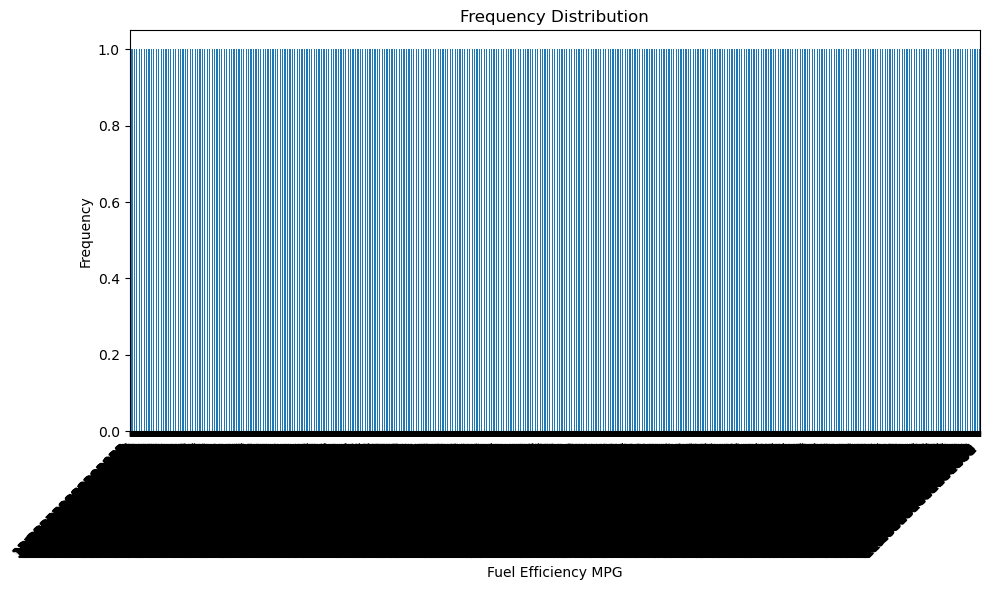

In [6]:
plt.figure(figsize=(10, 6))
sorted_counts.plot(kind='bar')
plt.title('Frequency Distribution')
plt.xlabel('Fuel Efficiency MPG')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
missing_counts = df_used.isnull().sum()
missing_counts

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [9]:
median = df_used['horsepower'].median()
median

149.0

In [10]:
df_shuffled = df_used.sample(frac=1, random_state=42).reset_index(drop=True)

In [17]:
train_df, temp_df = train_test_split(df_shuffled, test_size=0.4, random_state=42)
val_df, test_df   = train_test_split(temp_df, test_size=0.5, random_state=42)